## 任务三：图的十字链表存储结构的实现（难度：★★★★★）

**实现基本功能**：（包括但不限于，可以根据自己能力继续扩展）

　　根据《数据结构》课本上的思路，图的十字链表实现需要三个类：顶点结点类、弧结点类以及十字链表存储结构的图类；关于具体功能，这里给出我自己的一些想法，仅供参考，毕竟类内的函数不唯一，如果有更好地实现方式，小伙伴们可以自由发挥哈；

　1. 顶点结点类：只有**初始化**函数；

　　（1）数据域：data；存储与顶点相关的信息；

　　（2）指向弧头的第一个弧结点：firstin；

　　（3）指向弧尾的第一个弧结点：firstout；
	
　【提示：firstin和firstout一定要理解清楚，弧头弧尾理解好，**弧头是箭头指的结点，弧尾是箭头从哪里开始指的**！！】

　 2. 弧结点类：也是只有**初始化**函数；

　　（1）尾域：tailvex；表示弧尾指向的顶点位置；

　　（2）头域：headvex；表示弧头指向的顶点位置；

　　（3）指向弧头相同的下一条弧：hlink；
	
　　（4）指向弧尾相同的下一条弧：tlink；
	
　　（5）权重：weight；
	
　　（6）数据域：data；
	
　【提示：包含的参数一定要好好理解清楚，尤其是**弧头弧尾**，很容易混淆！】

　3. 十字链表存储结构的图类：

　　（1）图的初始化

　　（2）输出顶点列表数据

　　（3）添加顶点

　　（4）添加边：重要代码！很容易混淆！注意结点属性的含义！

　　（5）只输出正向边函数：涉及到firstout, tlink指针；

　　（6）只输出逆向边函数：涉及到firstin, hlink指针；

　　（7）正向逆向一起输出函数；

**测试案例：**

![Image Name](https://cdn.kesci.com/upload/image/qwy709ge0q.png?imageView2/0/w/960/h/640)


**输出结果：**

（1）正向输出：

　　V1 --> V2 --> V3 --> null
　　V2 --> null
　　V3 --> V4 --> null
　　V4 --> V1 --> V2 --> null

（2）逆向输出：

　　V1 <--  V4
　　V2 <--  V1 <--  V4
　　V3 <--  V1
　　V4 <--  V3

（3）正向逆向交叉输出

　　正向: V1 --> V2 --> V3 --> null
　　逆向: V1 <-- V4
　　正向: V2 --> null
　　逆向: V2 <-- V1 <-- V4
　　正向: V3 --> V4 --> null
　　逆向: V3 <-- V1
　　正向: V4 --> V1 --> V2 --> null
　　逆向: V4 <-- V3

　【注】：上述仅代表个人想法，如果小伙伴有更好展示方式，可以自由发挥哈，从结果中能看出来十字链表输出格式就可；


### 1. 定义顶点结点类

In [1]:
## 定义顶点结点类：firstin和firstout一定要理解清楚，弧头弧尾理解好！
class VexNode():
    def __init__(self, data):
        self.data = data # 顶点的数据域，存储顶点相关信息
        self.firstin = None # 指向弧头的第一个弧结点
        self.firstout = None # 指向弧尾的第一个弧结点

### 2. 定义弧边类

In [2]:
## 定义弧结点类:包含的参数一定要好好理解清楚，尤其是弧头弧尾，很容易混淆！
class Arc():
    def __init__(self, data, weight=0):
        self.tailvex = None # 尾域，表示弧尾指向的顶点位置
        self.headvex = None # 头域，表示弧头指向的顶点位置
        self.hlink = None # 指向弧头相同的下一条弧
        self.tlink = None # 指向弧尾相同的下一条弧
        self.weight = weight # 权重
        self.data = data # 数据

### 3. 定义十字链表存储结构的图类

In [3]:
## 定义图类
class GraphOrthogonalList():
    # 图的初始化
    def __init__(self):
        self.vexlist = []
        
    # 添加顶点
    def AddVertex(self, vexNode):
        self.vexlist.append(vexNode)
    
    # 输出顶点数据
    def PrintVertexData(self):
        data_list = []
        for vertex in self.vexlist:
            data_list.append(vertex.data) # 返回每个顶点的所存数据
        return data_list
    
    ## 添加边：重要代码！很容易混淆！注意结点属性的含义！
    def AddEdge(self, start, end, weight=0): # 注意：传过来的start是VexNode对象，end是ArcBox对象; start为弧尾，end为弧头
        ## 判断传入的两个顶点是否正确，start为弧尾，即为顶点
        if start not in self.vexlist or end.data not in self.PrintVertexData():
            print("输入的顶点错误！")
            return
        
        ## 添加正向边 : 例 V1 --> V2, 则V1为弧尾, V2为弧头, 操作指针主要有tailvex, firstout, tlink, 操作对象start
        end.tailvex = start # end的tailvex指针指向开始顶点,即为start弧尾对象
        if start.firstout == None: # 如果该顶点没有指向任何一个弧头结点，即下一弧头结点为空，则
            start.firstout = end # 让该顶点指向弧头结点end
        else: # 如果该顶点指向的弧头结点不为空，则开始循环遍历，找到最后一个弧头结点，并将end结点采用尾插法插入链表中
            nod_pos = start.firstout # 临时变量nod_pos，为了遍历到最后一个弧头结点
            while nod_pos.tlink != None: # tlink表示弧尾相同的结点的下一指针指向，通过操作tlink属性遍历到最后一个弧尾结点
                nod_pos = nod_pos.tlink
            nod_pos.tlink = end # 找到最后一个弧头结点后，尾插法插入新传入的end结点，当作start的最后一个弧头结点，tlink指针操控
        
        ## 添加逆向边 : 例 V1 --> V2, 则V1为弧尾, V2为弧头, 操作指针主要为headvex, firstin, hlink, 操作对象temp_end
        # 下面5行代码主要目的是：转换start和end的结点类型，因为传入的时候start是顶点，end是边，再设置逆向的时候，需要转换下各自类型
        temp_end = VexNode(None)
        for vex in self.vexlist:
            if vex.data == end.data:
                temp_end = vex # 将Arc类型换成VexNode类型
        temp_start = Arc(start.data) # 将VexNode类型换成Arc类型
        temp_end.headvex = temp_start # temp_end的headvex指向temp_start弧头
        if temp_end.firstin == None: # 如果该顶点没有指向任何一个弧尾结点，即下一弧尾结点为空，则
            temp_end.firstin = temp_start # temp_start结点即为temp_end的第一个弧尾结点
        else: # 如果该顶点指向的弧尾结点不为空，则开始循环遍历，找到最后一个弧头结点，并将start结点采用尾插法插入链表中
            nod_neg = temp_end.firstin
            while nod_neg.hlink != None: # hlink表示弧头相同的结点的下一指针指向，通过操作hlink属性遍历到最后一个弧尾结点
                nod_neg = nod_neg.hlink
            nod_neg.hlink = temp_start # 找到最后一个弧尾结点，尾插法插入temp_start结点，当作temp_end的最后一个弧尾结点，hlink指针操控

    # 只输出正向边 : 涉及到firstout, tlink指针
    def ShowProData(self):
        for vex in self.vexlist:
            if vex.firstout == None:
                print(vex.data, end = ' --> null')
                print()
                continue
            print(vex.data, end = ' --> ')
            nod = vex.firstout
            while nod != None:
                print(nod.data, end = ' --> ')
                nod = nod.tlink
            print('null')
            
    # 只输出逆向边 : 涉及到firstin, hlink指针
    def ShowNegData(self):
        for vex in self.vexlist:
            if vex.firstin == None:
                print(vex.data)
                continue
            print(vex.data, end = '')
            nod = vex.firstin
            while nod != None:
                print(' <-- ', nod.data, end = '')
                nod = nod.hlink
            print()
    
    # 正向逆向一起输出
    def ShowPosNegData(self):
        for vex in self.vexlist:
            label_pos = 0 # 设置两个临时变量，为了使得结果能够交叉输出
            label_neg = 0
            
            if vex.firstout == None: # 如果该顶点的下一指向为空
                print('正向:', vex.data, end = ' --> null')
                print()
                label_pos = 1
                
            if vex.firstin == None: # 如果没有结点指向该顶点
                print('逆向:', vex.data)
                label_neg = 1
           
            if label_pos == 0: # 如果该顶点的下一指向不为空
                print('正向:', vex.data, end = ' --> ')
                nod = vex.firstout
                while nod != None:
                    print(nod.data, end = ' --> ')
                    nod = nod.tlink
                print('null')
            
            if label_neg == 0: # 如果有结点指向该顶点
                print('逆向:', vex.data, end = '')
                nod = vex.firstin
                while nod != None:
                    print(' <--', nod.data, end = '')
                    nod = nod.hlink
                print()
            print()


### 4. 测试案例

- 一定要理解好这个图哈！是弄懂十字链表的关键！

![Image Name](https://cdn.kesci.com/upload/image/qwy709ge0q.png?imageView2/0/w/960/h/640)
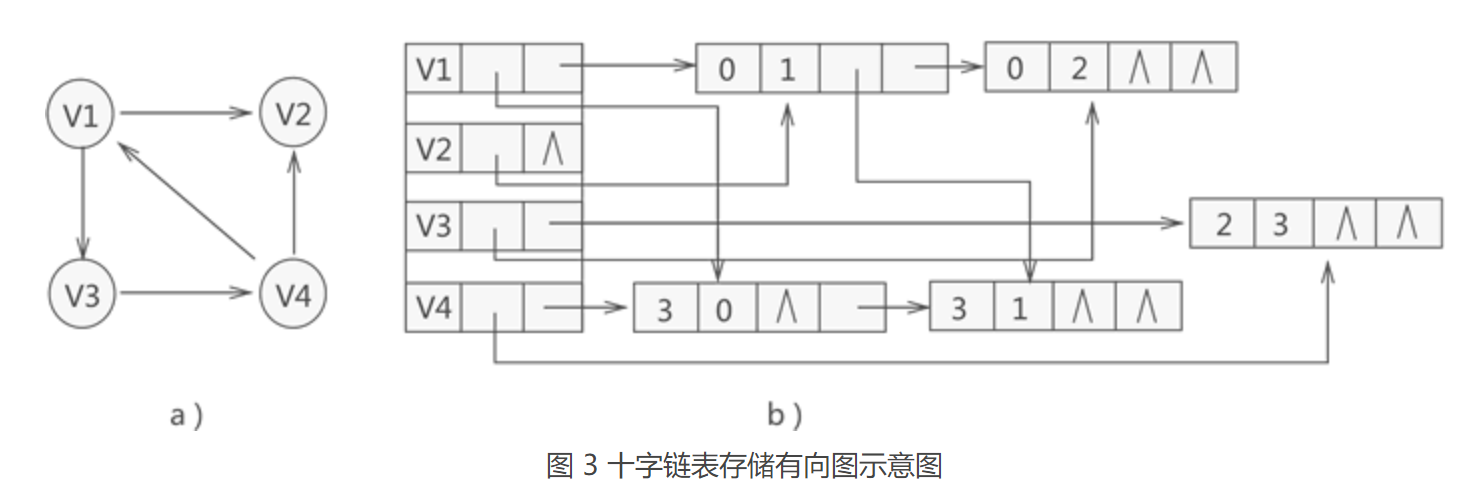

### 5. 创建一个十字链表存储的图对象，并添加4个顶点，分别为V1,V2,V3,V4

In [4]:
graph = GraphOrthogonalList()
V1 = VexNode('V1')
V2 = VexNode('V2')
V3 = VexNode('V3')
V4 = VexNode('V4')
vexs = [V1, V2, V3, V4]
for vex in vexs:
    graph.AddVertex(vex) # 将顶点添加到列表中
graph.PrintVertexData()

['V1', 'V2', 'V3', 'V4']

### 6. 实现一个有向图，如上图所示，根据图需添加5条边

In [5]:
graph.AddEdge(V1, Arc('V2'))
graph.AddEdge(V1, Arc('V3'))
graph.AddEdge(V3, Arc('V4'))
graph.AddEdge(V4, Arc('V1'))
graph.AddEdge(V4, Arc('V2'))

### 7. 正向输出每个顶点链表所指向的结点

In [6]:
# 正向输出
graph.ShowProData()

V1 --> V2 --> V3 --> null
V2 --> null
V3 --> V4 --> null
V4 --> V1 --> V2 --> null


### 8. 逆向输出每个顶点链表所指向的结点

In [7]:
# 逆向输出
graph.ShowNegData()

V1 <--  V4
V2 <--  V1 <--  V4
V3 <--  V1
V4 <--  V3


### 9. 正向逆向交叉输出，每个顶点的指向以及被指向

In [8]:
graph.ShowPosNegData()

正向: V1 --> V2 --> V3 --> null
逆向: V1 <-- V4

正向: V2 --> null
逆向: V2 <-- V1 <-- V4

正向: V3 --> V4 --> null
逆向: V3 <-- V1

正向: V4 --> V1 --> V2 --> null
逆向: V4 <-- V3

